In [1]:
# build moudel
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import ensemble, linear_model
from sklearn.linear_model.base import LinearRegression
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.svm.classes import SVR
from sklearn.tree.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble.bagging import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\more_one_hot\\data_id.csv')
target = data['Value']
target = target[0:1100]
data.drop(['ID','Value'],axis=1,inplace=True)



# 特征2
train2 = pd.read_csv('H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\less_one_hot\\data.csv')
train2.drop(['ID','Value'],axis=1,inplace=True)
testB2 = pd.read_csv('H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\less_one_hot\\testB.csv')
testB2.drop(['ID','Value'],axis=1,inplace=True)
data2 = pd.concat([train2,testB2])


# 分类标签转化 ， 低于2.6标签转化
def pos_value ( target ,ratio):
    size = target.size 
    sort_target = np.sort(np.array(target),axis=0)
    num = int(size*ratio)
    return sort_target[num] , sort_target[size-num]



# Ylabel标签化
def ylabe_encode( target, ratio ,flag=True ):
    low, up = pos_value( target , ratio)
    if (flag == True):
        target_low = pd.DataFrame(target)
        low_target = target_low [ target_low <= low ]
        up_target  = target_low [ target_low >  low  ]
        low_target=low_target.dropna()
        up_target = up_target.dropna()
        low_index = low_target.index
        up_index  = up_target.index
        target_low.ix[low_index,0] = 1
        target_low.ix[up_index,0] = 0
        return target_low
    else:
        target_up = pd.DataFrame(target)
        low_target = target_up [ target_up <= up ]
        up_target  = target_up [ target_up >  up  ]
        low_target=low_target.dropna()
        up_target = up_target.dropna()
        low_index = low_target.index
        up_index  = up_target.index
        target_up.ix[low_index,0] = 0
        target_up.ix[up_index,0] = 1
        return target_up


    
# 训练数据标签化
# 分类标签转化 ， 低于2.6标签转化
target_train_low2 =  ylabe_encode( target, 0.1785,flag=True )  
# 分类标签转化 ， 高于3.0标签转化
target_train_up2 =  ylabe_encode( target, 0.1785,flag=False )
 

# Imputer
from sklearn.preprocessing import Imputer
data2 = pd.DataFrame(Imputer().fit_transform(data2))

# 标准化
from sklearn.preprocessing import StandardScaler
Scaler_data2 = pd.DataFrame(StandardScaler().fit_transform(data2))


# 归一化
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler_data2 = pd.DataFrame(MinMaxScaler().fit_transform(Scaler_data2))

# 相关系数计算
import scipy.stats as stats

corr = []
p_value = []
corr_data2 = MinMaxScaler_data2.ix[0:1099,:]
feature_cols2 = list(corr_data2.columns)
y_col = target
for index_x in range(len(feature_cols2)):
        r, p=stats.pearsonr(corr_data2[index_x],target)
        corr.append(r)
        p_value.append(p)

s_corr = pd.Series(corr)
corr_filter = s_corr[abs(s_corr)>0.06]   # 阈值需要调整
corr_cols=corr_filter.index
data2 = MinMaxScaler_data2[corr_cols]
train2 = data2.ix[0:1099,:]
testB2 = data2.ix[1100:,:]

dtrain2 = xgb.DMatrix(train2,label=target_train_low2 )
dtrain22 = xgb.DMatrix(train2,label=target_train_up2  )
dtest2 = xgb.DMatrix(testB2)


# 特征3
data3 = pd.read_excel( 'H:\\java\\python\\src\\machinelearning\\train_shen\\train.xlsx' )
data3.drop(['Value','ID'], axis=1 ,inplace=True)
# cols = data.columns
testB3 = pd.read_excel( 'H:\\java\\python\\src\\machinelearning\\testB\\testB_diff6.xlsx')
testB3.drop('ID',axis=1 ,inplace=True)

# 训练数据标签化
# 分类标签转化 ， 低于2.6标签转化
target_train_low3 =  ylabe_encode( target, 0.1785,flag=True )  
# 分类标签转化 ， 高于3.0标签转化
target_train_up3 =  ylabe_encode( target, 0.1785,flag=False )

dtrain3 = xgb.DMatrix(data3,label=target_train_low3 )
dtrain33 = xgb.DMatrix(data3,label=target_train_up3 )
dtest3 = xgb.DMatrix(testB3)


In [3]:
# Imputer
from sklearn.preprocessing import Imputer
data = pd.DataFrame(Imputer().fit_transform(data))

# 标准化
from sklearn.preprocessing import StandardScaler
Scaler_data = pd.DataFrame(StandardScaler().fit_transform(data))


# 归一化
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler_data = pd.DataFrame(MinMaxScaler().fit_transform(Scaler_data))

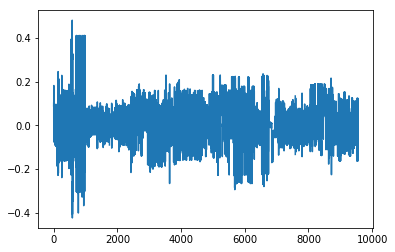

In [4]:
# 相关系数计算
import scipy.stats as stats

corr = []
p_value = []
corr_data = MinMaxScaler_data.ix[0:1099,:]
feature_cols = list(corr_data.columns)
y_col = target
for index_x in range(len(feature_cols)):
        r, p=stats.pearsonr(corr_data[index_x],target)
        corr.append(r)
        p_value.append(p)
        
import matplotlib.pyplot as plt

plt.plot(corr)
plt.show()

In [5]:
s_corr = pd.Series(corr)
corr_filter = s_corr[abs(s_corr)>0.06]   # 阈值需要调整
corr_cols=corr_filter.index
data = MinMaxScaler_data[corr_cols]

In [6]:
train = data.ix[0:1099,:]
testB = data.ix[1100:,:]

In [7]:
train.shape , testB.shape

((1100, 4003), (412, 4003))

In [8]:
# 分类标签转化 ， 低于2.6标签转化
def pos_value ( target ,ratio):
    size = target.size 
    sort_target = np.sort(np.array(target),axis=0)
    num = int(size*ratio)
    return sort_target[num] , sort_target[size-num]

In [9]:
target_low = target
low, up = pos_value( target_low , 0.1785)
low, up

(2.6019286250000002, 3.0074960829999999)

In [10]:
target_low = pd.DataFrame(target_low)
low_target = target_low [ target_low <= low ]
up_target  = target_low [ target_low >  low  ]
low_target=low_target.dropna()
up_target = up_target.dropna()
low_index = low_target.index
up_index  = up_target.index
target_low.ix[low_index,0] = 1
target_low.ix[up_index,0] = 0
print(len(low_index) , len(up_index))

197 903


In [11]:
scale_pos_weight = float(len(target_low )-sum(target_low.values))/sum(target_low.values)
scale_pos_weight

array([ 4.58375635])

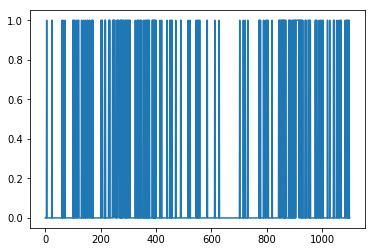

In [12]:
plt.plot(target_low)
plt.show( )

In [13]:
# 标签分类 ，value值大于3.0

In [14]:
def pos_value ( target ,ratio):
    size = target.size 
    sort_target = np.sort(np.array(target),axis=0)
    num = int(size*ratio)
    return sort_target[num] , sort_target[size-num]

In [15]:
low, up = pos_value( target , 0.1785)
low, up

(2.6019286250000002, 3.0074960829999999)

In [16]:
target_up = pd.DataFrame(target)
low_target = target_up [ target_up <= up ]
up_target  = target_up [ target_up >  up  ]
low_target=low_target.dropna()
up_target = up_target.dropna()
low_index = low_target.index
up_index  = up_target.index
target_up.ix[low_index,0] = 0
target_up.ix[up_index,0] = 1

In [17]:
print(len(low_index) , len(up_index))

905 195


In [18]:
scale_pos_weight = float(len(target_up)-sum(target_up.values))/sum(target_up.values)
scale_pos_weight

array([ 4.64102564])

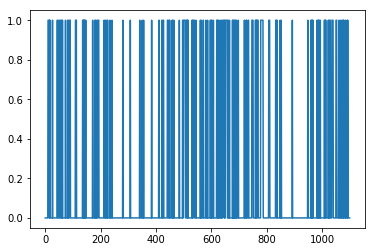

In [19]:
plt.plot(target_up)
plt.show( )

In [20]:
# Ylabel标签化
def ylabe_encode( target, ratio ,flag=True ):
    low, up = pos_value( target , ratio)
    if (flag == True):
        target_low = pd.DataFrame(target)
        low_target = target_low [ target_low <= low ]
        up_target  = target_low [ target_low >  low  ]
        low_target=low_target.dropna()
        up_target = up_target.dropna()
        low_index = low_target.index
        up_index  = up_target.index
        target_low.ix[low_index,0] = 1
        target_low.ix[up_index,0] = 0
        return target_low
    else:
        target_up = pd.DataFrame(target)
        low_target = target_up [ target_up <= up ]
        up_target  = target_up [ target_up >  up  ]
        low_target=low_target.dropna()
        up_target = up_target.dropna()
        low_index = low_target.index
        up_index  = up_target.index
        target_up.ix[low_index,0] = 0
        target_up.ix[up_index,0] = 1
        return target_up

In [21]:
# target_low1 =  ylabe_encode( target, 0.1785,flag=True )
# target_low1 

In [46]:
# build moudel
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import ensemble, linear_model
from sklearn.linear_model.base import LinearRegression
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.svm.classes import SVR
from sklearn.tree.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble.bagging import BaggingRegressor

#training xgboost
import xgboost as xgb
import pandas as pd
dtrain_low = xgb.DMatrix(train,label=target_low)
dtrain_up  = xgb.DMatrix(train,label=target_up)
dtest = xgb.DMatrix(testB)                     # 测试数据集合

mse = []
sum_mse = 0.0
B = pd.DataFrame(np.zeros((412,10)))
for index in range(3):
    X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=0.25) 
    
    # 训练数据标签化
    # 分类标签转化 ， 低于2.6标签转化
    target_train_low =  ylabe_encode( y_train, 0.1785,flag=True )
#     target_test_low  =  ylabe_encode( y_test, 0.1785,flag=True )
    target_train_low = xgb.DMatrix(X_train,label=target_train_low)
    dtest_low = xgb.DMatrix(X_test)   
    
    # 分类标签转化 ， 高于3.0标签转化
    target_train_up =  ylabe_encode( y_train, 0.1785,flag=False )
#     target_test_up  =  ylabe_encode( y_test, 0.1785,flag=False )
    target_train_up  = xgb.DMatrix(X_train,label=target_train_up)
    dtest_up = xgb.DMatrix(X_test)   
    
#     # model base model SVR
    model_svr=SVR( kernel='rbf', 
                 degree=8,            #
                gamma= 0.00145,
                coef0=0.1, 
                tol=0.001, 
                C=2.99,                #
                epsilon= 0.0054,  # 
                shrinking=True, 
                cache_size=500, 
                verbose=False, 
                max_iter=-1)
    model_svr.fit(X_train, y_train)
    y_svr = model_svr.predict(X_test)
    
    # model XGB base model : svr
    model_xgb_svr = xgb.XGBRegressor(model = xgb.XGBRegressor(max_depth=6, # 8    此处MSE为0.013
                                     min_child_weigh=5,
                                     eta=0.125,
                                     gamma=0.065,
                                     subsample=0.85,
                                     learning_rate=0.001, 
                                     n_estimators=1000, 
                                     silent=0, 
                                     n_jobs=-1,
                                     objective='reg:linear')
                               )
                            
    model_xgb_svr .fit(X_train, y_train)
    y_xgb_xgb = model_xgb_svr .predict(X_test)
    
    # model xgb base model -XGB
    model_xgb = xgb.XGBRegressor(model=SVR( kernel='rbf', 
                 degree=8,            #
                gamma= 0.0016,
                coef0=0.2, 
                tol=0.001, 
                C=2.3,                #
                epsilon= 0.0054,  # 
                shrinking=True, 
                cache_size=500, 
                verbose=False, 
                max_iter=-1))            
    model_xgb.fit(X_train, y_train)
    y_xgb = model_xgb.predict(X_test)
    # 模型融合
    
    # model lgb
    import lightgbm as lgb
    d_train = lgb.Dataset(X_train, label=y_train)

    params = {}
    params['max_bin'] = 20
    params['learning_rate'] =0.01# shrinkage_rate
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'regression'
    params['metric'] = 'mse'          # or 'mse'
    params['sub_feature'] = 0.6     # feature_fraction -- OK, back to .5, but maybe later increase this
    params['bagging_fraction'] = 0.7 # sub_row
    params['bagging_freq'] = 2
    params['num_leaves'] = 12        # num_leaf
    params['min_data'] = 10        # min_data_in_leaf
    params['min_hessian'] = 0.01     # min_sum_hessian_in_leaf
    params['verbose'] = 0
    params['num_threads']=8

    clf = lgb.train(params, d_train,2000)
    y_lgb = clf.predict(X_test)
    y_fusion = 0.1*y_svr + 0.3*y_xgb_xgb + 0.3*y_xgb + y_lgb*0.3 
    
    # 分类 1 ， 低于2.6的全部置为 2.4
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    watchlist  = [(target_train_low ,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,target_train_low ,num_boost_round=2500,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class1 = xgb.train(params,target_train_low,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
    test_y = model_class1.predict(dtest_low)
    pre_class1 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
    print(  pre_class1 )
    
    # 分类2 ， 低于3.0的全部置为3.2
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    
    #通过cv找最佳的nround
    watchlist  = [(target_train_up,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,target_train_up ,num_boost_round=25000,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class2 = xgb.train(params,target_train_up,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
    test_y =  model_class2.predict(dtest_up)
    pre_class2 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
    print( pre_class2 )
    
    # 融合 + 分类组合结果
    pre_class1 = pd.Series(pre_class1)
    pre_class2 = pd.Series(pre_class2)
    y_fusion   = pd.Series(y_fusion)
    for index in range( len(pre_class1) ):
        if(  pre_class1[index]==1 or pre_class2[index]==1 ):
            if( pre_class1[index]==1 and y_fusion[index]<2.6 ):
                y_fusion[index] = 2.5
            elif( pre_class2[index]==1 and y_fusion[index]>3.0 ):
                 y_fusion[index] = 3.2
            else:
                y_fusion[index] = y_fusion[index]
                
    sum_mse += mean_squared_error(y_test, y_fusion)
    mse.append(mean_squared_error(y_test, y_fusion))
    
    
    # predict
    # fusion
    y1 = model_svr.predict(testB)
    y2 = model_xgb_svr .predict(testB)
    y3 = model_xgb.predict(testB)
    y4 = clf.predict(testB)
    prey_fusion = 0.1*y1 + 0.3*y2 + 0.3*y3 + 0.3*y4
    prey_fusion1 = pd.DataFrame(prey_fusion)
    prey_fusion1.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\ronghe\\prey_fusion.csv')
    # predict classfication
    # low classification
    
    #########################################特征1#############################################################
    
     # 分类 1 ， 低于2.6的全部置为 2.4
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    watchlist  = [(dtrain_low,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,dtrain_low,num_boost_round=2500,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class1 = xgb.train(params,dtrain_low,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
#     test_y = model_class1.predict(dtest_low)
#     pre_class1 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
#     print(  pre_class1 )
    
    # 分类2 ， 低于3.0的全部置为3.2
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    
    #通过cv找最佳的nround
    watchlist  = [(dtrain_up ,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,dtrain_up  ,num_boost_round=25000,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class2 = xgb.train(params,dtrain_up ,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
#     test_y = model.predict(dtest_up)
    pre_class2 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
#     print( pre_class2 )

    test_y1 = model_class1.predict(dtest)
    prey_class1 = [round(value) for value in test_y1]
    # high  classification 
    test_y2 = model_class2.predict(dtest)
    prey_class2 = [round(value) for value in test_y2]
    
    
    
    
     #########################################特征2#############################################################      
     # 分类 1 ， 低于2.6的全部置为 2.4
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    watchlist  = [(dtrain2,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,dtrain2,num_boost_round=2500,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class1 = xgb.train(params,dtrain2,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
#     test_y = model_class1.predict(dtest_low)
#     pre_class1 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
#     print(  pre_class1 )
    
    # 分类2 ， 低于3.0的全部置为3.2
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    
    #通过cv找最佳的nround
    watchlist  = [(dtrain22 ,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,dtrain22  ,num_boost_round=25000,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class2 = xgb.train(params,dtrain22 ,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
#     test_y = model.predict(dtest_up)
    pre_class2 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
#     print( pre_class2 )

    test_y3 = model_class1.predict(dtest2)
    prey_class3 = [round(value) for value in test_y3]
    # high  classification 
    test_y4 = model_class2.predict(dtest2)
    prey_class4 = [round(value) for value in test_y4]
        
        
     #########################################特征3############################################################# 
     # 分类 1 ， 低于2.6的全部置为 2.4
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    watchlist  = [(dtrain3,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,dtrain3,num_boost_round=2500,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class1 = xgb.train(params,dtrain3,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
#     test_y = model_class1.predict(dtest_low)
#     pre_class1 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
#     print(  pre_class1 )
    
    # 分类2 ， 低于3.0的全部置为3.2
    params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'scale_pos_weight':  4.58375635 ,
    'eval_metric': 'auc',
    'max_depth':6,
    'lambda':100,
    'subsample':0.65,
    'colsample_bytree':0.65,
    'eta': 0.002,
    'seed':1024,
    'nthread':12
    }
    
    #通过cv找最佳的nround
    watchlist  = [(dtrain33 ,'train')]
    #通过cv找最佳的nround
    cv_log = xgb.cv(params,dtrain33  ,num_boost_round=25000,nfold=5,metrics='auc',early_stopping_rounds=50,seed=1024)
    bst_auc= cv_log['test-auc-mean'].max()
    cv_log['nb'] = cv_log.index
    cv_log.index = cv_log['test-auc-mean']
    bst_nb = cv_log.nb.to_dict()[bst_auc]
    #train
    model_class2 = xgb.train(params,dtrain33 ,num_boost_round=bst_nb+50,evals=watchlist)
    #predict test set
#     test_y = model.predict(dtest_up)
    pre_class2 = [round(value) for value in test_y]
    print (bst_nb,bst_auc)
#     print( pre_class2 )

    test_y5 = model_class1.predict(dtest3)
    prey_class5 = [round(value) for value in test_y5]
    # high  classification 
    test_y6 = model_class2.predict(dtest3)
    prey_class6 = [round(value) for value in test_y6]
    
    ############################################over#############################################################
    
   # 融合 + 分类组合结果
    prey_class1 = pd.Series(prey_class1)
    prey_class2 = pd.Series(prey_class2)
    prey_class3 = pd.Series(prey_class3)
    prey_class4 = pd.Series(prey_class4)
    prey_class5 = pd.Series(prey_class5)
    prey_class6 = pd.Series(prey_class6)
    prey_fusion   = pd.Series(prey_fusion)
    for index in range( len(prey_class1) ):
        if(  prey_class1[index]==1 or prey_class2[index]==1 ):
            if( prey_class1[index]==1 and prey_fusion[index]<2.6 ):
                prey_fusion[index] = 2.5
            elif( prey_class2[index]==1 and prey_fusion[index]>3.0 ):
                 prey_fusion[index] = 3.2
            else:
                prey_fusion[index] = prey_fusion[index]
#     for index in range( len(prey_class1) ):
#         if( prey_class1[index]+prey_class5[index]>=1):
#             if( prey_fusion[index] <=2.6 ):
#                 prey_fusion[index] = 2.5
#         elif(prey_class2[index]+prey_class6[index]>=1):
#             if( prey_fusion[index] >=3.0 ):
#                 prey_fusion[index] = 3.2
#         else:
#             prey_fusion[index] = prey_fusion[index] 
            
#     predict = pd.DataFrame(model.predict(testB))
#     B[index] = predict
#         print("index: ",index,mean_squared_error(y_test,y_pred))
print(pd.DataFrame(mse))
print('-----------------------------------------')
print(sum_mse/3)

[0]	train-auc:0.82677
[1]	train-auc:0.918185
[2]	train-auc:0.950228
[3]	train-auc:0.951949
[4]	train-auc:0.952583
[5]	train-auc:0.950582
[6]	train-auc:0.953811
[7]	train-auc:0.956555
[8]	train-auc:0.956336
[9]	train-auc:0.958202
[10]	train-auc:0.957543
[11]	train-auc:0.956326
[12]	train-auc:0.955472
[13]	train-auc:0.952393
[14]	train-auc:0.951276
[15]	train-auc:0.951635
[16]	train-auc:0.954639
[17]	train-auc:0.95429
[18]	train-auc:0.955757
[19]	train-auc:0.95403
[20]	train-auc:0.952638
[21]	train-auc:0.955447
[22]	train-auc:0.958012
[23]	train-auc:0.959834
[24]	train-auc:0.958851
[25]	train-auc:0.959804
[26]	train-auc:0.961166
[27]	train-auc:0.961655
[28]	train-auc:0.960967
[29]	train-auc:0.962114
[30]	train-auc:0.960787
[31]	train-auc:0.959869
[32]	train-auc:0.959859
[33]	train-auc:0.960458
[34]	train-auc:0.960408
[35]	train-auc:0.959639
[36]	train-auc:0.958661
[37]	train-auc:0.957972
[38]	train-auc:0.957443
[39]	train-auc:0.956944
[40]	train-auc:0.956685
[41]	train-auc:0.956036
[42]	

[51]	train-auc:0.959247
[52]	train-auc:0.959156
[53]	train-auc:0.959217
[54]	train-auc:0.959328
[55]	train-auc:0.959489
[56]	train-auc:0.959479
[57]	train-auc:0.959156
[58]	train-auc:0.959388
[59]	train-auc:0.95953
[60]	train-auc:0.959711
[61]	train-auc:0.95957
[62]	train-auc:0.95963
[63]	train-auc:0.959802
[64]	train-auc:0.959872
[65]	train-auc:0.95957
[66]	train-auc:0.959701
[67]	train-auc:0.959701
[68]	train-auc:0.9596
[69]	train-auc:0.95961
[70]	train-auc:0.959751
[71]	train-auc:0.959862
[72]	train-auc:0.95958
[73]	train-auc:0.95953
[74]	train-auc:0.95955
[75]	train-auc:0.959489
[76]	train-auc:0.959429
[77]	train-auc:0.959247
[78]	train-auc:0.959166
[79]	train-auc:0.959197
[80]	train-auc:0.958934
[81]	train-auc:0.958944
[82]	train-auc:0.958733
[83]	train-auc:0.958844
[84]	train-auc:0.958844
[85]	train-auc:0.958753
[86]	train-auc:0.958813
[87]	train-auc:0.958763
[88]	train-auc:0.959005
[89]	train-auc:0.958904
[90]	train-auc:0.959146
[91]	train-auc:0.959368
[92]	train-auc:0.959166
[9

[78]	train-auc:0.953331
[79]	train-auc:0.95337
[80]	train-auc:0.953449
[81]	train-auc:0.953433
[82]	train-auc:0.953574
[83]	train-auc:0.953512
[84]	train-auc:0.953619
[85]	train-auc:0.953554
[86]	train-auc:0.953645
[87]	train-auc:0.953719
[88]	train-auc:0.953673
[89]	train-auc:0.953673
[90]	train-auc:0.953874
[91]	train-auc:0.953866
[92]	train-auc:0.954036
43 0.8920078
[0]	train-auc:0.870477
[1]	train-auc:0.894593
[2]	train-auc:0.921604
[3]	train-auc:0.921092
[4]	train-auc:0.921129
[5]	train-auc:0.920822
[6]	train-auc:0.919645
[7]	train-auc:0.917953
[8]	train-auc:0.925075
[9]	train-auc:0.923245
[10]	train-auc:0.928594
[11]	train-auc:0.933324
[12]	train-auc:0.932515
[13]	train-auc:0.932048
[14]	train-auc:0.930854
[15]	train-auc:0.930426
[16]	train-auc:0.930261
[17]	train-auc:0.929075
[18]	train-auc:0.93254
[19]	train-auc:0.934561
[20]	train-auc:0.938268
[21]	train-auc:0.937198
[22]	train-auc:0.939783
[23]	train-auc:0.93987
[24]	train-auc:0.940829
[25]	train-auc:0.939918
[26]	train-auc:0

[54]	train-auc:0.948775
[55]	train-auc:0.948837
[56]	train-auc:0.948851
[57]	train-auc:0.94895
[58]	train-auc:0.948871
[59]	train-auc:0.94895
[60]	train-auc:0.948939
[61]	train-auc:0.949242
[62]	train-auc:0.949211
[63]	train-auc:0.949044
[64]	train-auc:0.949225
[65]	train-auc:0.949081
[66]	train-auc:0.948882
[67]	train-auc:0.948871
[68]	train-auc:0.948854
[69]	train-auc:0.94903
[70]	train-auc:0.948905
[71]	train-auc:0.948775
[72]	train-auc:0.948718
[73]	train-auc:0.948814
[74]	train-auc:0.94852
[75]	train-auc:0.94878
[76]	train-auc:0.948735
[77]	train-auc:0.948837
[78]	train-auc:0.948752
[79]	train-auc:0.948809
[80]	train-auc:0.948837
[81]	train-auc:0.94912
[82]	train-auc:0.949126
[83]	train-auc:0.949205
[84]	train-auc:0.949018
[85]	train-auc:0.948979
[86]	train-auc:0.949024
[87]	train-auc:0.949115
[88]	train-auc:0.949058
[89]	train-auc:0.949069
40 0.8910348
[0]	train-auc:0.857649
[1]	train-auc:0.912815
[2]	train-auc:0.91637
[3]	train-auc:0.916291
[4]	train-auc:0.924583
[5]	train-auc:0

[103]	train-auc:0.963721
[104]	train-auc:0.963492
[105]	train-auc:0.963841
[106]	train-auc:0.963462
[107]	train-auc:0.963671
[108]	train-auc:0.963771
[109]	train-auc:0.963382
[110]	train-auc:0.963162
[111]	train-auc:0.963681
[112]	train-auc:0.963432
[113]	train-auc:0.963541
[114]	train-auc:0.963871
65 0.8490576
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0

[65]	train-auc:0.953087
[66]	train-auc:0.953325
[67]	train-auc:0.95337
[68]	train-auc:0.953331
[69]	train-auc:0.953404
[70]	train-auc:0.953296
[71]	train-auc:0.953342
[72]	train-auc:0.953274
[73]	train-auc:0.953331
[74]	train-auc:0.953342
[75]	train-auc:0.953438
[76]	train-auc:0.953393
[77]	train-auc:0.953438
[78]	train-auc:0.953331
[79]	train-auc:0.95337
[80]	train-auc:0.953449
[81]	train-auc:0.953433
[82]	train-auc:0.953574
[83]	train-auc:0.953512
[84]	train-auc:0.953619
[85]	train-auc:0.953554
[86]	train-auc:0.953645
[87]	train-auc:0.953719
[88]	train-auc:0.953673
[89]	train-auc:0.953673
[90]	train-auc:0.953874
[91]	train-auc:0.953866
[92]	train-auc:0.954036
43 0.8920078
[0]	train-auc:0.870477
[1]	train-auc:0.894593
[2]	train-auc:0.921604
[3]	train-auc:0.921092
[4]	train-auc:0.921129
[5]	train-auc:0.920822
[6]	train-auc:0.919645
[7]	train-auc:0.917953
[8]	train-auc:0.925075
[9]	train-auc:0.923245
[10]	train-auc:0.928594
[11]	train-auc:0.933324
[12]	train-auc:0.932515
[13]	train-auc:

[41]	train-auc:0.948276
[42]	train-auc:0.948182
[43]	train-auc:0.948548
[44]	train-auc:0.94848
[45]	train-auc:0.948724
[46]	train-auc:0.948865
[47]	train-auc:0.948803
[48]	train-auc:0.948775
[49]	train-auc:0.948834
[50]	train-auc:0.948701
[51]	train-auc:0.948956
[52]	train-auc:0.948956
[53]	train-auc:0.94878
[54]	train-auc:0.948775
[55]	train-auc:0.948837
[56]	train-auc:0.948851
[57]	train-auc:0.94895
[58]	train-auc:0.948871
[59]	train-auc:0.94895
[60]	train-auc:0.948939
[61]	train-auc:0.949242
[62]	train-auc:0.949211
[63]	train-auc:0.949044
[64]	train-auc:0.949225
[65]	train-auc:0.949081
[66]	train-auc:0.948882
[67]	train-auc:0.948871
[68]	train-auc:0.948854
[69]	train-auc:0.94903
[70]	train-auc:0.948905
[71]	train-auc:0.948775
[72]	train-auc:0.948718
[73]	train-auc:0.948814
[74]	train-auc:0.94852
[75]	train-auc:0.94878
[76]	train-auc:0.948735
[77]	train-auc:0.948837
[78]	train-auc:0.948752
[79]	train-auc:0.948809
[80]	train-auc:0.948837
[81]	train-auc:0.94912
[82]	train-auc:0.949126


[90]	train-auc:0.96428
[91]	train-auc:0.963891
[92]	train-auc:0.963502
[93]	train-auc:0.963601
[94]	train-auc:0.963492
[95]	train-auc:0.963901
[96]	train-auc:0.963821
[97]	train-auc:0.96421
[98]	train-auc:0.96414
[99]	train-auc:0.96405
[100]	train-auc:0.963701
[101]	train-auc:0.963521
[102]	train-auc:0.963492
[103]	train-auc:0.963721
[104]	train-auc:0.963492
[105]	train-auc:0.963841
[106]	train-auc:0.963462
[107]	train-auc:0.963671
[108]	train-auc:0.963771
[109]	train-auc:0.963382
[110]	train-auc:0.963162
[111]	train-auc:0.963681
[112]	train-auc:0.963432
[113]	train-auc:0.963541
[114]	train-auc:0.963871
65 0.8490576
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 

[52]	train-auc:0.953251
[53]	train-auc:0.952991
[54]	train-auc:0.952979
[55]	train-auc:0.952985
[56]	train-auc:0.95307
[57]	train-auc:0.953064
[58]	train-auc:0.952962
[59]	train-auc:0.952962
[60]	train-auc:0.953098
[61]	train-auc:0.953047
[62]	train-auc:0.953217
[63]	train-auc:0.953143
[64]	train-auc:0.953053
[65]	train-auc:0.953087
[66]	train-auc:0.953325
[67]	train-auc:0.95337
[68]	train-auc:0.953331
[69]	train-auc:0.953404
[70]	train-auc:0.953296
[71]	train-auc:0.953342
[72]	train-auc:0.953274
[73]	train-auc:0.953331
[74]	train-auc:0.953342
[75]	train-auc:0.953438
[76]	train-auc:0.953393
[77]	train-auc:0.953438
[78]	train-auc:0.953331
[79]	train-auc:0.95337
[80]	train-auc:0.953449
[81]	train-auc:0.953433
[82]	train-auc:0.953574
[83]	train-auc:0.953512
[84]	train-auc:0.953619
[85]	train-auc:0.953554
[86]	train-auc:0.953645
[87]	train-auc:0.953719
[88]	train-auc:0.953673
[89]	train-auc:0.953673
[90]	train-auc:0.953874
[91]	train-auc:0.953866
[92]	train-auc:0.954036
43 0.8920078
[0]	tr

KeyboardInterrupt: 

In [41]:
prey_fusion.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\ronghe\\ronghe333.csv')

In [44]:
prey_class1.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\ronghe\\class_low1.csv')
prey_class3.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\ronghe\\class_low2.csv')
prey_class5.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\ronghe\\class_up1.csv')
prey_class6.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\ronghe\\class_up2.csv')

In [43]:
prey_class1 ,prey_class3 ,prey_class5

(0      0.0
 1      0.0
 2      1.0
 3      0.0
 4      1.0
 5      1.0
 6      1.0
 7      1.0
 8      0.0
 9      1.0
 10     1.0
 11     0.0
 12     1.0
 13     1.0
 14     1.0
 15     0.0
 16     1.0
 17     0.0
 18     0.0
 19     0.0
 20     0.0
 21     0.0
 22     1.0
 23     0.0
 24     0.0
 25     0.0
 26     0.0
 27     0.0
 28     0.0
 29     1.0
       ... 
 382    0.0
 383    0.0
 384    0.0
 385    0.0
 386    0.0
 387    0.0
 388    0.0
 389    0.0
 390    0.0
 391    0.0
 392    0.0
 393    1.0
 394    0.0
 395    0.0
 396    0.0
 397    0.0
 398    0.0
 399    0.0
 400    0.0
 401    0.0
 402    0.0
 403    1.0
 404    1.0
 405    1.0
 406    1.0
 407    0.0
 408    1.0
 409    0.0
 410    0.0
 411    0.0
 Length: 412, dtype: float64, 0      0.0
 1      0.0
 2      1.0
 3      0.0
 4      1.0
 5      1.0
 6      1.0
 7      1.0
 8      0.0
 9      1.0
 10     1.0
 11     0.0
 12     1.0
 13     1.0
 14     1.0
 15     0.0
 16     1.0
 17     0.0
 18     0.0
 19     0.0

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
5      1.0
6      1.0
7      1.0
8      0.0
9      1.0
10     1.0
11     0.0
12     1.0
13     1.0
14     1.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     1.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     1.0
      ... 
382    0.0
383    0.0
384    0.0
385    0.0
386    0.0
387    0.0
388    0.0
389    0.0
390    0.0
391    0.0
392    0.0
393    1.0
394    0.0
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
400    0.0
401    0.0
402    0.0
403    1.0
404    1.0
405    1.0
406    1.0
407    0.0
408    1.0
409    0.0
410    0.0
411    0.0
Length: 412, dtype: float64

In [ ]:
B.head( )
B.var() , B.mean( )

In [ ]:
B.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\more_one_hot\\predict_more_one_hot\\svr.csv')

In [ ]:
# XGBOOST
# build moudel
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import ensemble, linear_model
from sklearn.linear_model.base import LinearRegression
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.svm.classes import SVR
from sklearn.tree.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble.bagging import BaggingRegressor
mse = []
B = pd.DataFrame(np.zeros((300,10)))
sum_mse = 0.0

for index in range(10):
    X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=0.1) 
    model = xgb.XGBRegressor(model = xgb.XGBRegressor(max_depth=6, # 8    此处MSE为0.013
                                     min_child_weigh=5,
                                     eta=0.125,
                                     gamma=0.065,
                                     subsample=0.85,
                                     learning_rate=0.001, 
                                     n_estimators=1000, 
                                     silent=0, 
                                     n_jobs=-1,
                                     objective='reg:linear')
                               )
                            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))
    sum_mse += mean_squared_error(y_test,y_pred)
    predict = pd.DataFrame(model.predict(testA))
    B[index] = predict
print(pd.DataFrame(mse))
print('------------------------------------------------------------')
print(sum_mse/10)

In [ ]:
B.var() , B.mean( )

In [ ]:
B.to_csv(  'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\more_one_hot\\predict_more_one_hot\\XGB(svr).csv')

In [ ]:
# XGBOOST
# build moudel
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import ensemble, linear_model
from sklearn.linear_model.base import LinearRegression
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.svm.classes import SVR
from sklearn.tree.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble.bagging import BaggingRegressor
mse = []
B = pd.DataFrame(np.zeros((300,10)))
sum_mse = 0.0

for index in range(10):
    X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=0.1) 
    model = xgb.XGBRegressor(model=SVR( kernel='rbf', 
                 degree=8,            #
                gamma= 0.0016,
                coef0=0.2, 
                tol=0.001, 
                C=2.3,                #
                epsilon= 0.0054,  # 
                shrinking=True, 
                cache_size=500, 
                verbose=False, 
                max_iter=-1))
                            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))
    sum_mse += mean_squared_error(y_test,y_pred)
    predict = pd.DataFrame(model.predict(testA))
    B[index] = predict
print(pd.DataFrame(mse))
print('------------------------------------------------------------')
print(sum_mse/10)

In [ ]:
B.var() , B.mean( )

In [ ]:
B.to_csv( 'H:\\java\\python\\src\\machinelearning\\seconddata\\shen\\more_one_hot\\predict_more_one_hot\\XGB(xgb).csv')